# Deep Neural Network with Mnist

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Tensorflow also has a graph approach (as opposed to keras) which is distributed training and some processes will run in parallel

# Using Tensorflow Keras with Mnist, a clean and de-noised dataset, or Fashion_Mnist datasets, a very noisey dataset
# Noise is residuals of a model, i.e. unexplained variance in a model

%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
print(tf.__version__)

ModuleNotFoundError: No module named 'sklearn'

In [2]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
# If we want a validation dataset, use train-test split on the xtrain and ytrain

In [3]:
xtrain.shape

(60000, 28, 28)

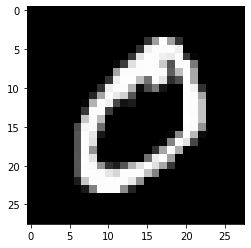

In [4]:
pyplot.imshow(xtrain[1,:,:],cmap="gray")

In [5]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [6]:
L = pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [7]:
# Represent Training & Testing samples suitable for tensorflow backend, flattening the 28, 28 

x_train = xtrain.reshape(xtrain.shape[0],784).astype("float32")
x_test = xtest.reshape(xtest.shape[0],784).astype("float32")

In [8]:
x_test.shape

(10000, 784)

In [9]:
x_train/=225
x_test/=225

In [10]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [11]:
# Initialize the constructor

model = Sequential()

# Define model architecture

model.add(Dense(784,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam", metrics=['accuracy'])

epochs = 20
batch_size = 20000

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs, callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
                    validation_split=0.1, verbose=True)
loss,accuracy = model.evaluate(x_test, y_test,verbose=False)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 66us/sample - loss: 2.0796 - accuracy: 0.3790 - val_loss: 1.4062 - val_accuracy: 0.7802
Epoch 2/20
54000/54000 [==============================] - 2s 39us/sample - loss: 1.2359 - accuracy: 0.7602 - val_loss: 0.7530 - val_accuracy: 0.8495
Epoch 3/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.7253 - accuracy: 0.8245 - val_loss: 0.4664 - val_accuracy: 0.8823
Epoch 4/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.5074 - accuracy: 0.8566 - val_loss: 0.3491 - val_accuracy: 0.9067
Epoch 5/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.4115 - accuracy: 0.8825 - val_loss: 0.3009 - val_accuracy: 0.9148
Epoch 6/20
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3631 - accuracy: 0.8950 - val_loss: 0.2694 - val_accuracy: 0.9193
Epoch 7/20
54000/54000 [==============================] -

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  615440    
_________________________________________________________________
dense_1 (Dense)              multiple                  78500     
_________________________________________________________________
dense_2 (Dense)              multiple                  1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


[0.37898147, 0.76024073, 0.8245, 0.8565556, 0.88248146, 0.895, 0.90416664, 0.91374075, 0.9204074, 0.9265, 0.9318148, 0.93538886, 0.94005555, 0.9427037, 0.946537, 0.9493333, 0.9515741, 0.95442593, 0.95666665, 0.9584444]
[0.7801667, 0.8495, 0.88233334, 0.9066667, 0.9148333, 0.91933334, 0.93083334, 0.9371667, 0.93983334, 0.9468333, 0.94766665, 0.95066667, 0.9545, 0.9546667, 0.9576667, 0.96066666, 0.962, 0.9635, 0.9636667, 0.96466666]


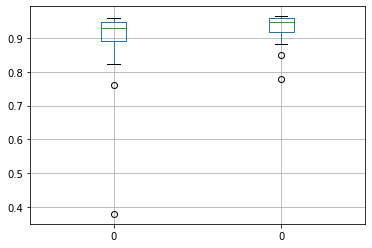

In [15]:
print(history.history["accuracy"])
print(history.history["val_accuracy"])

ta = pd.DataFrame(history.history["accuracy"])
va = pd.DataFrame(history.history["val_accuracy"])

tva = pd.concat([ta,va], axis=1)

tva.boxplot()

In [16]:
loss,acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %.3f"%acc)
print("Test Loss: %.3f"%loss) # Loss is error

loss,acc = model.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy: %.3f"%acc)
print("Train Loss: %.3f"%loss)

Test Accuracy: 0.956
Test Loss: 0.151
Train Accuracy: 0.961
Train Loss: 0.141


In [17]:
y_predict = model.predict(x_test)

In [18]:
y_predict[0]

array([9.5141759e-06, 3.4305808e-07, 9.7183416e-05, 2.0422349e-03,
       1.0045854e-06, 1.9923797e-05, 2.6087019e-08, 9.9772745e-01,
       5.2580417e-06, 9.7014243e-05], dtype=float32)

In [19]:
np.argmax(y_predict[0])

7

In [20]:
y_pred = []

for val in y_predict:
    y_pred.append(np.argmax(val))

#print(y_pred)

# Convert 0 1 to 1 and 1 0 to 0
from sklearn import metrics

cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 963    0    1    1    0    3    8    3    1    0]
 [   0 1118    3    1    0    1    3    2    7    0]
 [   5    1  982   11    4    1    5    7   15    1]
 [   0    1   11  965    0    8    1   10   11    3]
 [   1    1    8    0  940    0    6    4    2   20]
 [   5    1    0   18    2  838   12    1    9    6]
 [   7    3    3    0    6   10  923    2    4    0]
 [   1   11   15    5    2    1    0  979    2   12]
 [   4    3    5   18    5    7   10   11  907    4]
 [   8    6    2   12   19    5    1    8    6  942]]


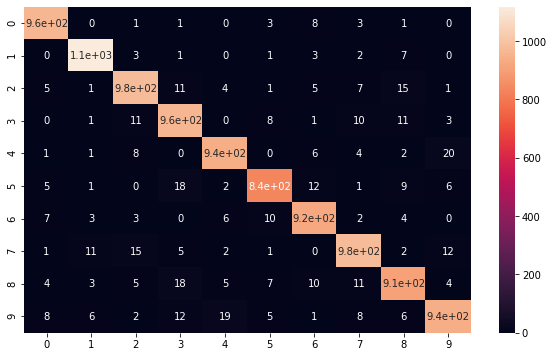

In [21]:
import seaborn as sns

pyplot.figure(figsize=(10,6))  
sns.heatmap(cm, annot=True)

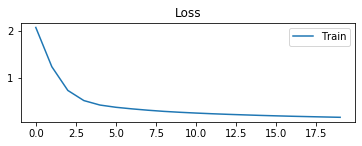

In [22]:
%matplotlib inline

# Plot loss during training
pyplot.subplot(211)
pyplot.title("Loss")
pyplot.plot(history.history["loss"], label = "Train")
pyplot.legend()